<a href="https://colab.research.google.com/github/stevengregori92/World-Happiness-2019-with-RidgeCV/blob/main/World_Happiness_with_RidgeCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

#Import Data

In [ ]:
data = pd.read_csv('2019.csv')
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


#Analyze

In [ ]:
len(data), len(data.dropna())

(156, 156)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
X = data.drop(['Country or region', 'Score', 'Overall rank'], axis = 1)
y = data['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  rcv = RidgeCV()
  rcv.fit(X_train_set, y_train)
  y_pred = rcv.predict(X_test_set)
  score.append(r2_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,0.610347
Standardized,0.610128


In [ ]:
rcv = RidgeCV()

rcv.fit(X_train, y_train)
perm_importance = permutation_importance(rcv, X_test, y_test)
perm_importance.importances

array([[-0.00286078,  0.04341645,  0.20745276,  0.15064222,  0.15797132],
       [ 0.04655003,  0.08265942,  0.2398099 ,  0.21946252,  0.21573974],
       [-0.00416763,  0.02134698,  0.14648971,  0.09427457,  0.08683386],
       [ 0.05157738,  0.05629283,  0.08738754,  0.04935398,  0.05706339],
       [ 0.01355637,  0.00435123,  0.00981057,  0.00297164,  0.01164421],
       [ 0.00736033, -0.00357441,  0.00142134, -0.00746084,  0.01544305]])

#Visualize Data

<Axes: >

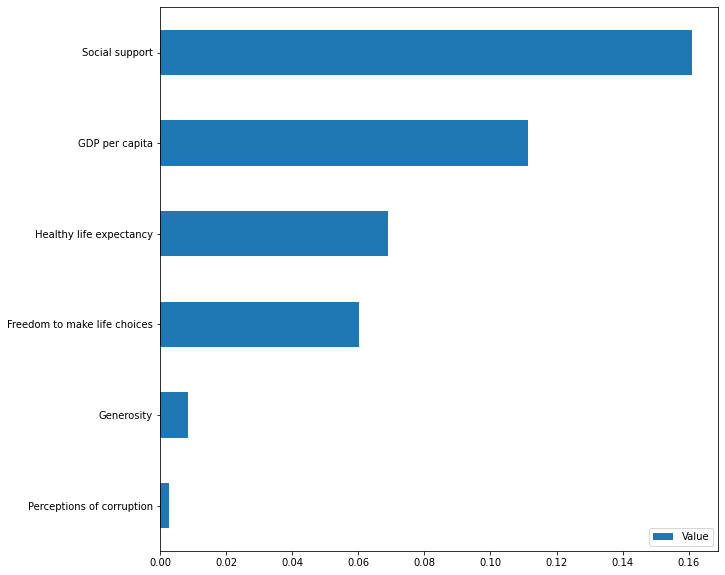

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Insights
- Factors which influenced Happiness Score are:
  1. Social Support
  2. GDP per capita

- Factors which mostly influenced Happiness Score are:
  1. Social Support
  2. GDP per capita
  3. Healthy life expectancy
  4. Freedom to make life choices

- Here are some ways to increase social support in a country:

  1. Strengthen social safety nets: A strong social safety net can provide support for individuals who are in need, such as those who are unemployed, disabled, or elderly. This can include programs such as unemployment benefits, disability insurance, and old-age pensions.

  2. Invest in public services: Investing in public services such as education, healthcare, and public transportation can help to create a more supportive and connected society. Access to quality education and healthcare can promote social mobility and improve overall well-being, while public transportation can help to connect people to their communities and reduce social isolation.

  3. Foster community engagement: Encouraging community engagement and participation can help to create a sense of belonging and social connectedness. This can include initiatives such as community centers, community events, and volunteer opportunities.

  4. Promote social cohesion: Promoting social cohesion and reducing inequality can help to create a more supportive and inclusive society. This can include policies that promote equal access to education, healthcare, and other resources, as well as efforts to reduce discrimination and promote diversity.

  5. Support families and caregivers: Providing support for families and caregivers can help to reduce stress and promote well-being. This can include policies such as parental leave, childcare subsidies, and support for eldercare.

  6. Address mental health: Addressing mental health is critical to promoting social support. This can include increasing access to mental health services, reducing stigma, and promoting mental health awareness.

- Here are some ways to increase GDP per capita:

  1. Promote economic growth: One of the most important ways to increase GDP per capita is to promote economic growth. This can be done through policies that encourage investment, innovation, and entrepreneurship.

  2. Invest in infrastructure: Infrastructure such as roads, bridges, airports, and ports can provide the foundation for economic growth by facilitating trade and commerce. Investment in infrastructure can also create jobs and stimulate economic activity.

  3. Promote education and skills development: Education and skills development are critical to increasing productivity and driving economic growth. Providing access to quality education and training programs can help to develop the skills and knowledge needed for a modern economy.

  4. Promote international trade: International trade can help to expand markets, increase competition, and drive economic growth. Policies that promote free trade, reduce trade barriers, and support export-oriented industries can help to increase GDP per capita.

  5. Encourage foreign investment: Foreign investment can bring new capital, technology, and expertise to a country, which can help to stimulate economic growth. Policies that create a favorable investment climate, such as tax incentives and regulatory reforms, can help to attract foreign investment.

  6. Promote innovation and technology: Innovation and technology are critical to economic growth and productivity. Policies that promote research and development, protect intellectual property rights, and support entrepreneurship can help to drive innovation and create new industries.

  7. Address income inequality: Addressing income inequality is important for promoting sustainable economic growth and increasing GDP per capita. This can include policies that promote equitable access to education, healthcare, and other resources, as well as measures to reduce poverty and promote social mobility.

